## Exploring Hacker News Posts

In this project, we will be working with a dataset of submissions to popular technology site [Hacker News](https://news.ycombinator.com/). Hacker News is virtually a Reddit-like forum, but is extremely popular in the technology and startup communities. We are interested in posts with titles that begin with either `Ask HN` or `Show HN`. Users submit `Ask HN` posts to ask the Hacker News community a specific question, while users will submit `Show HN` posts to show a project, product, or just something interesting.

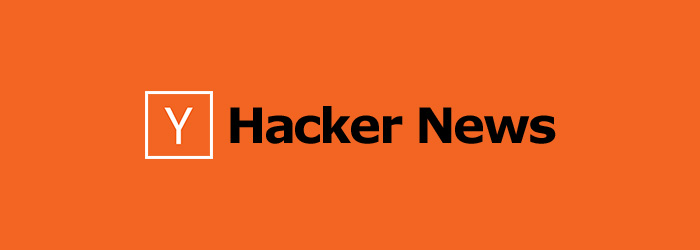

The goal of this project is to answer the following questions:

- Do `Ask HN` or `Show HN` receive more comments on average?
- Do posts created at a certain time receive more comments on average?
- Do `Ask HN` or `Show HN` receive more points on average?
- Do posts created at a certain time receive more points on average?

Let's start importing the libraries we need and "reading" the dataset into a list of lists. Please note that the dataset has been cleaned from nearly 300,000 rows to approximately 20,000 rows by removing all submissions that didn't receive any comments and then randomly sampling from the remaining submissions.

# Introduction

We read the data, assign them to a variable, and print the first five rows.

In [1]:
# Read the data and display the first five rows
import csv

f = open('hacker_news.csv')
hn = list(csv.reader(f))
hn[:5]

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'],
 ['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01']]

We can see that the first list contains the column headers, and the following lists contain the details of each post. We need to remove the row containing the column headers in order to analyze the data.

# Removing The Header From A List of Lists

In [2]:
# Extract the first row of data
headers = hn[0]
headers

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

In [21]:
# Only contain the data without the header row
hn = hn[1:]
hn[:5] # Print 5 data

[['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01'],
 ['10301696',
  'Note by Note: The Making of Steinway L1037 (2007)',
  'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
  '8',
  '2',
  'walterbell',
  '9/30/2015 4:12'],
 ['10482257',
  'Title II kills investment? Comcast and other ISPs are now spending more',
  'http://arstechnica.com/business/2015/10/comcast-and-other-isps-boost-network-

# Extracting Ask HN and Show HN Posts

Now that we have removed the headers from `hn`, we can proceed to filter our data. We will create new lists of lists containing just the data for `Ask HN` and `Show HN`. To find the post that begin with either title, we'll use  the string method `startswith`.

In [4]:
# Create three empty lists
ask_posts = []
show_posts = []
other_posts = []

# Loop the data and append to the lists above
for row in hn:
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
print('The number of posts of those lists are: ask_posts is {}, show_posts is {}, and other posts is {}'.format(len(ask_posts),len(show_posts),len(other_posts)))

The number of posts of those lists are: ask_posts is 1744, show_posts is 1162, and other posts is 17194


# Calculating the Average Number of Comments for Ask HN and Show HN Posts

We will calculate the average number of comments each post. How? We are going to sum total comments for both `Ask HN` and `Show HN`, and divide each particular sum with the number of posts for each `Ask HN` and `Show HN`.

In [22]:
# Create a counter for the total number of ask comments
total_ask_comments = 0

# Loop to iterate over the ask posts and add total_ask_comments with number of comments for each post
for row in ask_posts:
    num_comments = int(row[4])
    total_ask_comments += num_comments
    
avg_ask_comments = total_ask_comments / len(ask_posts)
print(avg_ask_comments)

# Create a counter for the total number of show comments 
total_show_comments = 0

# Loop to iterate over the show posts and add total_show_comments with number of comments for each post
for row in show_posts:
    num_comments = int(row[4])
    total_show_comments += num_comments
    
avg_show_comments = total_show_comments / len(show_posts)
print(avg_show_comments)

14.038417431192661
10.31669535283993


From these calculations, we can determine that ask_posts (14) have more comments, on average, than show_posts (10.3).

# Finding the Number of Ask Posts and Comments by Hour Created

Since we have determined that ask_posts have more comments, on average, then we will focus our analysis just on these posts. Next, we are going to determine if ask posts created at a certain time are more likely to attract comments. We'll do the following:

1. Calculate the number of ask posts created in each hour of the day, along with the number of comments received.
2. Calculate the average number of comments ask posts receive by hour created.

We'll use the `datetime` module to work with the data in the `created_at` column.

In [6]:
# Import the datetime module
from datetime import datetime as dt

# Iterate over ask_posts and append to a list
result_list = []

for row in ask_posts:
    created_at = row[6]
    num_comments = int(row[4])
    
    result_list.append([created_at, num_comments])
    
    counts_by_hour = {}
    comments_by_hour = {}
    
    for row in result_list:
        date = row[0]
        comment = int(row[1])
        hour = dt.strptime(date,'%m/%d/%Y %H:%M').strftime("%H") # Create a datetime object and select just the hour
        
        if hour not in counts_by_hour: # Creating a dictionary key if the key is not yet present
            counts_by_hour[hour] = 1
            comments_by_hour[hour] = comment
            
        elif hour in counts_by_hour: # If it is, then add based on hour
            counts_by_hour[hour] += 1
            comments_by_hour[hour] += comment

In [7]:
comments_by_hour

{'09': 251,
 '13': 1253,
 '10': 793,
 '14': 1416,
 '16': 1814,
 '23': 543,
 '12': 687,
 '17': 1146,
 '15': 4477,
 '21': 1745,
 '20': 1722,
 '02': 1381,
 '18': 1439,
 '03': 421,
 '05': 464,
 '19': 1188,
 '01': 683,
 '22': 479,
 '08': 492,
 '04': 337,
 '00': 447,
 '06': 397,
 '07': 267,
 '11': 641}

# Calculating the Average Number of Comments for Ask HN Posts by Hour

On the previous screen, we created two dictionaries:

- `counts_by_hour`: contains the number of ask posts created each hour of the day
- `comments_by_hour`: contains the corresponding number of comments ask posts created at each hour received

Next, we'll use these two dictionaries to calculate the average number of comments for posts created during each hour of the day.

In [8]:
avg_by_hour = []

for hour in comments_by_hour:
    avg_by_hour.append([hour, comments_by_hour[hour] / counts_by_hour[hour]])

In [9]:
avg_by_hour

[['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.20183486238532],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.127272727272727],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

# Sorting and Printing Values from a List of Lists

Let us sort the avg_by_hour list and print the five highest values in a format that's easier to read.

In [10]:
swap_avg_by_hour = []

for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]]) # Swap the elements in avg_by_hour
    
print(swap_avg_by_hour)

[[5.5777777777777775, '09'], [14.741176470588234, '13'], [13.440677966101696, '10'], [13.233644859813085, '14'], [16.796296296296298, '16'], [7.985294117647059, '23'], [9.41095890410959, '12'], [11.46, '17'], [38.5948275862069, '15'], [16.009174311926607, '21'], [21.525, '20'], [23.810344827586206, '02'], [13.20183486238532, '18'], [7.796296296296297, '03'], [10.08695652173913, '05'], [10.8, '19'], [11.383333333333333, '01'], [6.746478873239437, '22'], [10.25, '08'], [7.170212765957447, '04'], [8.127272727272727, '00'], [9.022727272727273, '06'], [7.852941176470588, '07'], [11.051724137931034, '11']]


In [11]:
sorted_swap = sorted(swap_avg_by_hour, reverse=True)
sorted_swap

[[38.5948275862069, '15'],
 [23.810344827586206, '02'],
 [21.525, '20'],
 [16.796296296296298, '16'],
 [16.009174311926607, '21'],
 [14.741176470588234, '13'],
 [13.440677966101696, '10'],
 [13.233644859813085, '14'],
 [13.20183486238532, '18'],
 [11.46, '17'],
 [11.383333333333333, '01'],
 [11.051724137931034, '11'],
 [10.8, '19'],
 [10.25, '08'],
 [10.08695652173913, '05'],
 [9.41095890410959, '12'],
 [9.022727272727273, '06'],
 [8.127272727272727, '00'],
 [7.985294117647059, '23'],
 [7.852941176470588, '07'],
 [7.796296296296297, '03'],
 [7.170212765957447, '04'],
 [6.746478873239437, '22'],
 [5.5777777777777775, '09']]

In [12]:
print("Top 5 Hours for Ask Posts Comments")

for avg, hr in sorted_swap[:5]:
    hour = dt.strptime(hr, '%H').strftime('%H:%M')
    print('{}: {:.2f} average comments per post'.format(dt.strptime(hr, '%H').strftime('%H:%M'), avg))

Top 5 Hours for Ask Posts Comments
15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


Therefore, we can conclude that `Ask HN` posts stand the best chance of receiving more comments when posted at 3:00 PM. The difference is substantial. Posting an `Ask HN` post at 3:00 PM is likely to attract 60% more comments per post than posting at 2:00 AM, the second-highest period for comments on average.

# Determining Whether Show or Ask Posts Receive More Points On Average

Now that we've established that, on average, `Ask HN` posts receive more comments than `Show HN` posts, let's explore which type of posts garner a higher average number of points per post. Let's delve into that!

In [13]:
# Calculating total points for ask posts
total_ask_pts = 0

for row in ask_posts:
    pts = int(row[3]) # Make it an integer
    total_ask_pts += pts
    
avg_ask_pts = total_ask_pts / len(ask_posts)

# Calculating total points for show posts
total_show_pts = 0

for row in show_posts:
    pts = int(row[3])
    total_show_pts += pts
    
avg_show_pts = total_show_pts / len(show_posts)
    
print("Total point for ask posts is {} and show posts is {}".format(avg_ask_pts, avg_show_pts))

Total point for ask posts is 15.061926605504587 and show posts is 27.555077452667813


Since `Show HN` posts receive more points, on average, than `Ask HN` posts, we are going to focus on `Show HN` posts. In the next section, we are going to determine if posts created at a certain time are more likely to receive more points. The process will similar to what we did earlier.

In [23]:
# Iterate over show_posts and append it to a list
result_list = []

for row in show_posts:
    created_at = row[6]
    num_pts = int(row[3])
    result_list.append([created_at, num_pts])
    
    counts_by_hour = {}
    pts_by_hour = {}
    
    for row in result_list:
        date = row[0]
        pts = int(row[1])
        hour = dt.strptime(date, '%m/%d/%Y %H:%M').strftime('%H')
        
        if hour not in counts_by_hour:
            counts_by_hour[hour] = 1
            pts_by_hour[hour] = pts
            
        elif hour in counts_by_hour:
            counts_by_hour[hour] += 1
            pts_by_hour[hour] += pts

In [15]:
pts_by_hour

{'14': 2187,
 '22': 1856,
 '18': 2215,
 '07': 494,
 '20': 1819,
 '05': 104,
 '16': 2634,
 '19': 1702,
 '15': 2228,
 '03': 679,
 '17': 2521,
 '06': 375,
 '02': 340,
 '13': 2438,
 '08': 519,
 '21': 866,
 '04': 386,
 '11': 1480,
 '12': 2543,
 '23': 1526,
 '09': 553,
 '01': 700,
 '10': 681,
 '00': 1173}

Now, we are going to calculate the average pts per hour, swap it, and sort the list.

In [24]:
# Calculate total pts for each hour and divide it by total number of post in that hour
avg_pts_by_hour = []

for hour in counts_by_hour:
    avg_pts_by_hour.append([hour, pts_by_hour[hour] / counts_by_hour[hour]])

In [17]:
avg_pts_by_hour

[['14', 25.430232558139537],
 ['22', 40.34782608695652],
 ['18', 36.31147540983606],
 ['07', 19.0],
 ['20', 30.316666666666666],
 ['05', 5.473684210526316],
 ['16', 28.322580645161292],
 ['19', 30.945454545454545],
 ['15', 28.564102564102566],
 ['03', 25.14814814814815],
 ['17', 27.107526881720432],
 ['06', 23.4375],
 ['02', 11.333333333333334],
 ['13', 24.626262626262626],
 ['08', 15.264705882352942],
 ['21', 18.425531914893618],
 ['04', 14.846153846153847],
 ['11', 33.63636363636363],
 ['12', 41.68852459016394],
 ['23', 42.388888888888886],
 ['09', 18.433333333333334],
 ['01', 25.0],
 ['10', 18.916666666666668],
 ['00', 37.83870967741935]]

In [25]:
# Swap the list and sort the date
swap_pts_by_hour = []

for row in avg_pts_by_hour:
    swap_pts_by_hour.append([row[1], row[0]])

In [19]:
sorted_swap_pts = sorted(swap_pts_by_hour, reverse=True)
sorted_swap_pts

[[42.388888888888886, '23'],
 [41.68852459016394, '12'],
 [40.34782608695652, '22'],
 [37.83870967741935, '00'],
 [36.31147540983606, '18'],
 [33.63636363636363, '11'],
 [30.945454545454545, '19'],
 [30.316666666666666, '20'],
 [28.564102564102566, '15'],
 [28.322580645161292, '16'],
 [27.107526881720432, '17'],
 [25.430232558139537, '14'],
 [25.14814814814815, '03'],
 [25.0, '01'],
 [24.626262626262626, '13'],
 [23.4375, '06'],
 [19.0, '07'],
 [18.916666666666668, '10'],
 [18.433333333333334, '09'],
 [18.425531914893618, '21'],
 [15.264705882352942, '08'],
 [14.846153846153847, '04'],
 [11.333333333333334, '02'],
 [5.473684210526316, '05']]

Now, we are going to print out the top 5 hour based on the average number of points in that particular hour.

In [20]:
print("Top 5 Hours for Show Posts Points")

for avg, hr in sorted_swap_pts[:5]:
    hour = dt.strptime(hr, '%H').strftime('%H:%M')
    print('{}: {:.2f} average points per post'.format(dt.strptime(hr, '%H').strftime('%H:%M'), avg))

Top 5 Hours for Show Posts Points
23:00: 42.39 average points per post
12:00: 41.69 average points per post
22:00: 40.35 average points per post
00:00: 37.84 average points per post
18:00: 36.31 average points per post


The above result indicates that posting `Show HN` posts at 23:00 or 11 PM has a higher chance of garnering more points per post than at any other time during the day.

In summary, based on these analyses, we have learned that `Ask HN` posts generally receive a higher average of points than show posts. Conversely, `Show HN` posts accrue a higher average of points per post than ask posts. 

Unlike comments on ask posts, where posting at 3 PM attracts 60% more comments than the second-highest comment per post, the top 5 show posts' points don't exhibit much difference. However, the pattern suggests that you are more likely to receive more points in the evening.